Confirmed by Omar

#MetroPT-3 Dataset for Classification

In this project, we use real-world sensor data from a metro train's air compressor system (MetroPT-3) to analyze system performance and predict failures using machine learning. The goal is to detect anomalies early and support predictive maintenance to reduce downtime and improve operational efficiency.

📊 **Dataset Summary:**
- **Total instances (rows):** 1,516,948  
- **Number of features:** 15 real-valued sensor signals  
- **Type:** Multivariate, Time-Series  
- **Sampling Rate:** 1 Hz  
- **Period Covered:** February to August 2020  

🔗 Dataset link: [MetroPT-3 Dataset on UCI] https://archive.ics.uci.edu/dataset/791/metropt+3+dataset

In [57]:
# Check GPU availability
!nvidia-smi

Wed Apr 16 22:20:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   73C    P0             30W /   70W |    1182MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 1- Preparing libraries & Dataset

In [58]:
!pip install wget
import wget

In [59]:
# dawnload this dataset from URL(https://archive.ics.uci.edu/dataset/791/metropt+3+dataset)

import wget

# Download the dataset
!wget https://archive.ics.uci.edu/static/public/791/metropt+3+dataset.zip

# Unzip the dataset
!unzip metropt+3+dataset.zip


--2025-04-16 22:20:40--  https://archive.ics.uci.edu/static/public/791/metropt+3+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘metropt+3+dataset.zip.4’

metropt+3+dataset.z     [                <=> ] 208.26M  2.09MB/s    in 62s     

2025-04-16 22:21:43 (3.33 MB/s) - ‘metropt+3+dataset.zip.4’ saved [218381995]

Archive:  metropt+3+dataset.zip
replace Data Description_Metro.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Data Description_Metro.pdf  
replace MetroPT3(AirCompressor).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: MetroPT3(AirCompressor).csv  


In [60]:
!pip install gputil


In [61]:
%load_ext cudf.pandas

# Basic data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GPU-accelerated DataFrames
import cudf
from cudf import DataFrame, Series

# GPU-accelerated ML model selection and preprocessing
from cuml.model_selection import train_test_split
from cuml.preprocessing import StandardScaler
from cuml.preprocessing import OneHotEncoder

# GPU-accelerated ML models (at least three different models as required)
from cuml.linear_model import LogisticRegression
from cuml.ensemble import RandomForestClassifier
from cuml.svm import SVC
from cuml.neighbors import KNeighborsClassifier

from cuml.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import time
import GPUtil

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


# 2. EXPLORATORY DATA ANALYSIS (EDA)



In [62]:
df = cudf.read_csv('/content/MetroPT3(AirCompressor).csv')
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [63]:
# Display basic information
print("\nBasic Information:")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())

# Check data types and missing values
print("\nData types and missing values:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe().T)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Basic Information:
Number of records: 1516948
Number of features: 17

Column names:
['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

Data types and missing values:
<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   Unnamed: 0       1516948 non-null  int64
 1   timestamp        1516948 non-null  object
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-nul

In [64]:
for column in df.columns:
  print(f"Value counts for column '{column}':")
  print(df[column].value_counts())
  print("\n")

Value counts for column 'Unnamed: 0':
Unnamed: 0
0           1
10          1
20          1
30          1
40          1
           ..
15169430    1
15169440    1
15169450    1
15169460    1
15169470    1
Name: count, Length: 1516948, dtype: int64


Value counts for column 'timestamp':
timestamp
2020-02-01 00:00:00    1
2020-02-01 00:00:10    1
2020-02-01 00:00:19    1
2020-02-01 00:00:29    1
2020-02-01 00:00:39    1
                      ..
2020-09-01 03:59:10    1
2020-09-01 03:59:20    1
2020-09-01 03:59:30    1
2020-09-01 03:59:40    1
2020-09-01 03:59:50    1
Name: count, Length: 1516948, dtype: int64


Value counts for column 'TP2':
TP2
-0.012     445519
-0.014     338189
-0.010     245546
-0.016     116893
-0.008      54118
            ...  
 10.612         1
 10.638         1
 10.640         1
 10.652         1
 10.676         1
Name: count, Length: 5257, dtype: int64


Value counts for column 'TP3':
TP3
8.506     20085
8.168     14250
9.728      7444
8.248      6084
8.284      

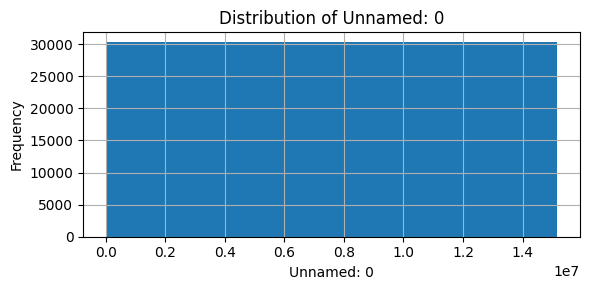

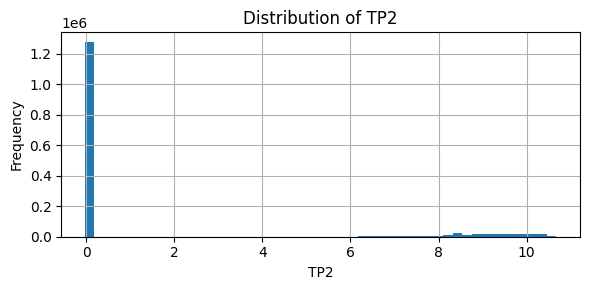

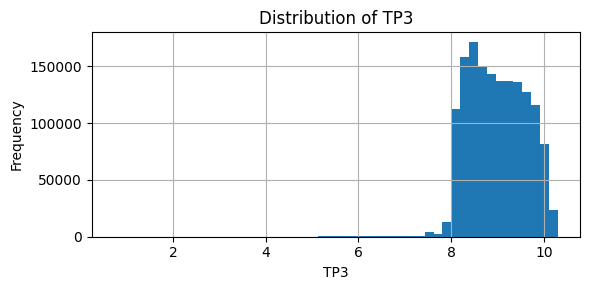

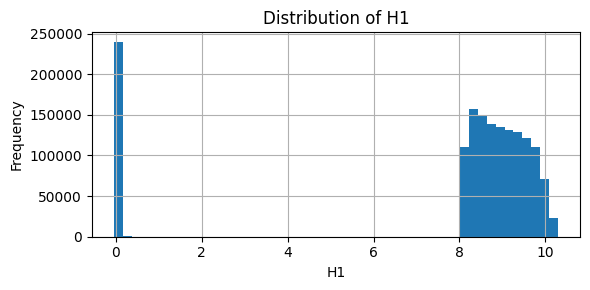

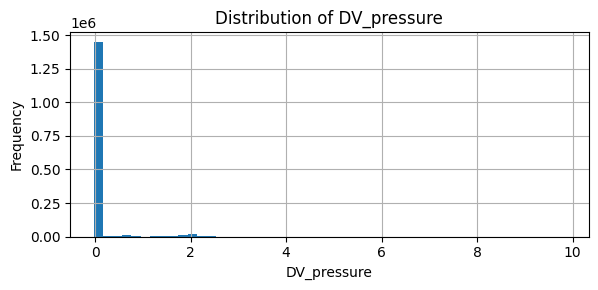

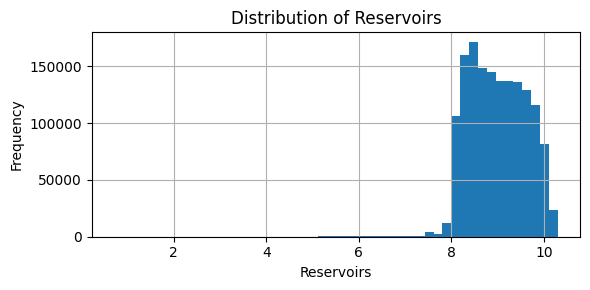

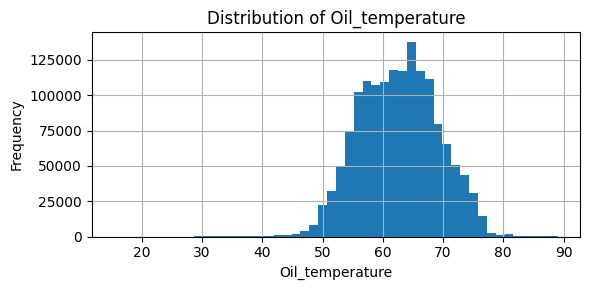

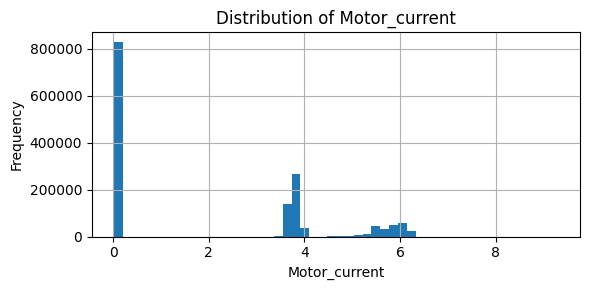

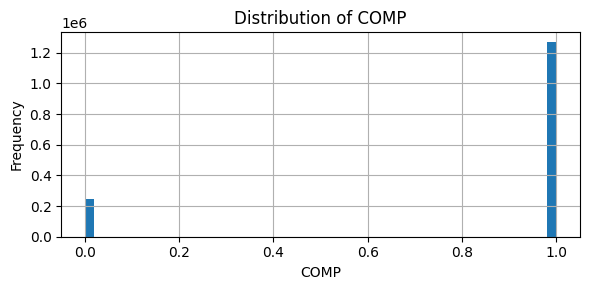

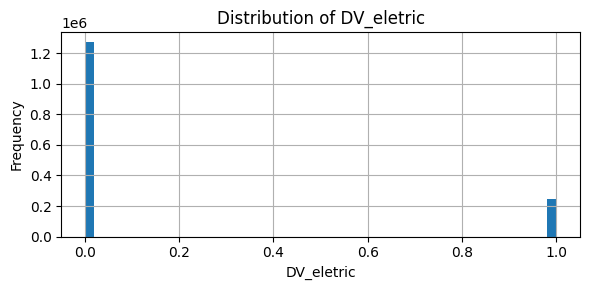

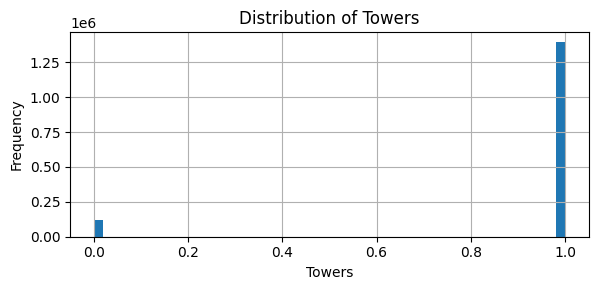

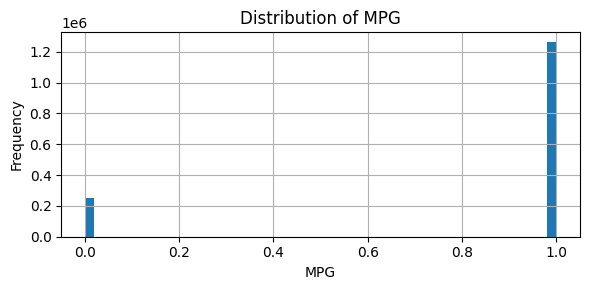

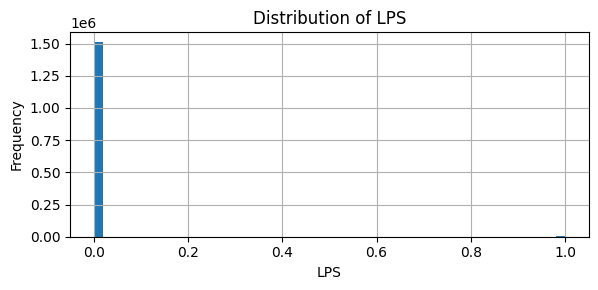

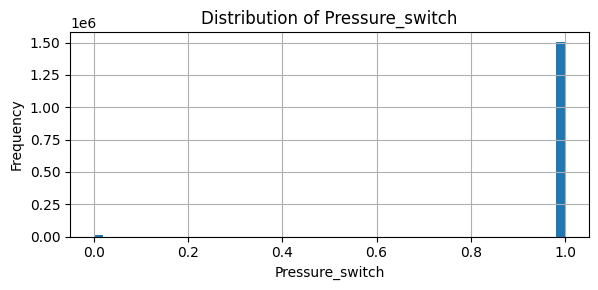

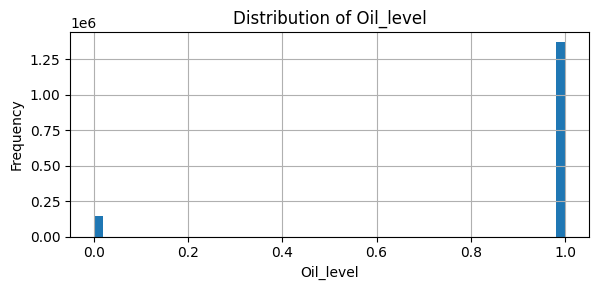

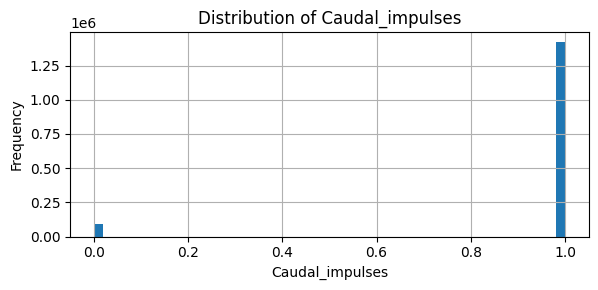

In [65]:
import matplotlib.pyplot as plt

for col in df.columns:
    if col not in ['timestamp', 'label']:
        plt.figure(figsize=(6, 3))
        df[col].to_pandas().hist(bins=50)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


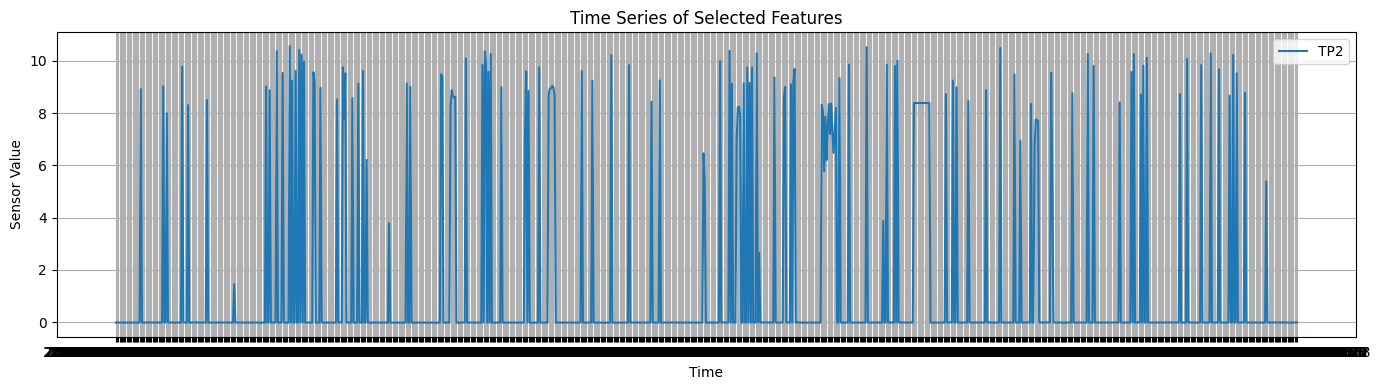

In [66]:
#Time Series of Selected Features
sample_df = df.sample(n=1000, random_state=42).sort_values('timestamp')

plt.figure(figsize=(14, 4))
plt.plot(sample_df['timestamp'].to_pandas(), sample_df['TP2'].to_pandas(), label='TP2')

# Access the 'Motor Current' column using its exact name from sample_df.columns
# This will ensure it works correctly:
motor_current_col = next((col for col in sample_df.columns if col.strip().lower() == 'motor current'), None)

if motor_current_col:
    plt.plot(sample_df['timestamp'].to_pandas(), sample_df[motor_current_col].to_pandas(), label='Motor Current')
else:
    print("Warning: 'Motor Current' column not found in sample_df")

plt.xlabel("Time")
plt.ylabel("Sensor Value")
plt.title("Time Series of Selected Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

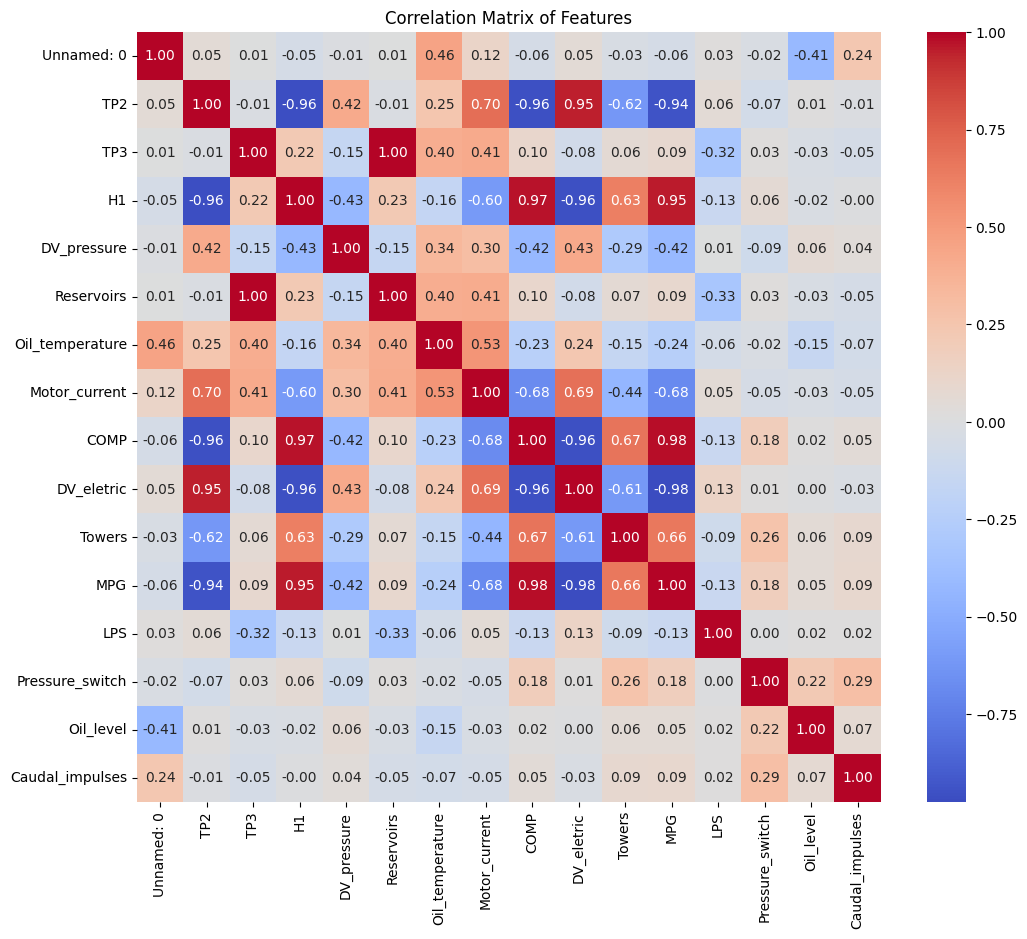

In [67]:
# Correlation matrix
import matplotlib.pyplot as plt

# Exclude the 'timestamp' column when calculating the correlation
correlation_matrix = df.drop(columns=['timestamp']).corr()

# Convert the cuDF DataFrame to a pandas DataFrame
correlation_matrix = correlation_matrix.to_pandas()

# Get column names from the correlation matrix
column_names = correlation_matrix.columns  # Assign column names here

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=column_names, yticklabels=column_names)
plt.title('Correlation Matrix of Features')
plt.show()

In [68]:
# Initialize label column with 0 (no fault)
df['label'] = 0

# Convert 'timestamp' column to datetime
df['timestamp'] = cudf.to_datetime(df['timestamp'])

# Define fault periods using pandas timestamps
fault_periods = [
    (pd.to_datetime('2020-04-18 00:00:00'), pd.to_datetime('2020-04-18 23:59:59')),
    (pd.to_datetime('2020-05-29 23:30:00'), pd.to_datetime('2020-05-30 06:00:00')),
    (pd.to_datetime('2020-06-05 10:00:00'), pd.to_datetime('2020-06-07 14:30:00')),
    (pd.to_datetime('2020-07-15 14:30:00'), pd.to_datetime('2020-07-15 19:00:00'))
]

# Re-assign labels based on timestamps
for start_time, end_time in fault_periods:
    # Convert pandas Timestamps to strings and then to cudf timestamps
    start_time_str = start_time.strftime('%Y-%m-%d %H:%M:%S')
    end_time_str = end_time.strftime('%Y-%m-%d %H:%M:%S')

    start_time_cudf = cudf.to_datetime(start_time_str)
    end_time_cudf = cudf.to_datetime(end_time_str)

    # Apply the filter
    mask = (df['timestamp'] >= start_time_cudf) & (df['timestamp'] <= end_time_cudf)
    df.loc[mask, 'label'] = 1

In [69]:
df["label"]

0          0
1          0
2          0
3          0
4          0
          ..
1516943    0
1516944    0
1516945    0
1516946    0
1516947    0
Name: label, Length: 1516948, dtype: int64

In [70]:
df['label'].value_counts()


label
0    1486988
1      29960
Name: count, dtype: int64

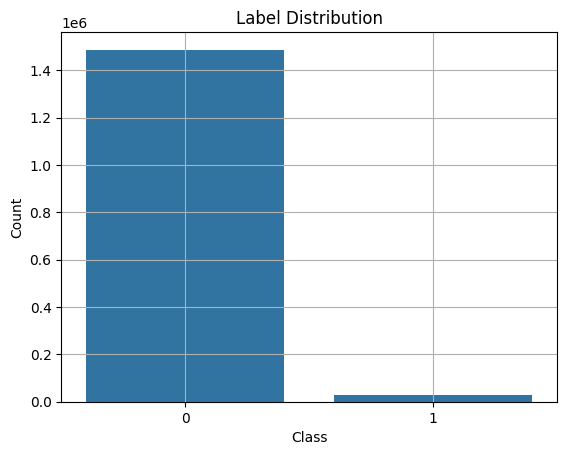

In [71]:
#Countplot for lab
sns.countplot(x=df['label'].to_pandas())
plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [72]:
# --- Balance the dataset by undersampling class 0 ---
# Undersample the majority directly on the cuDF DataFrame
df_0 = df[df['label'] == 0].sample(n=10000, random_state=42)
df_1 = df[df['label'] == 1]

# Combine using cuDF's concat
df_balanced = cudf.concat([df_0, df_1]) # Use cuDF's concat

# Shuffle using cuDF's sample
df_balanced = df_balanced.sample(frac=1, random_state=42) # Use cuDF's sample

# Reassign df
df = df_balanced

# Optional: reset index if needed
df.reset_index(drop=True, inplace=True)

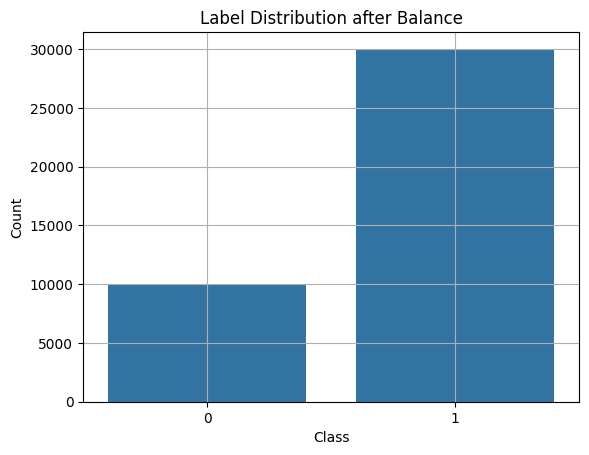

In [73]:
#Countplot for lab
sns.countplot(x=df['label'].to_pandas())
plt.title("Label Distribution after Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()


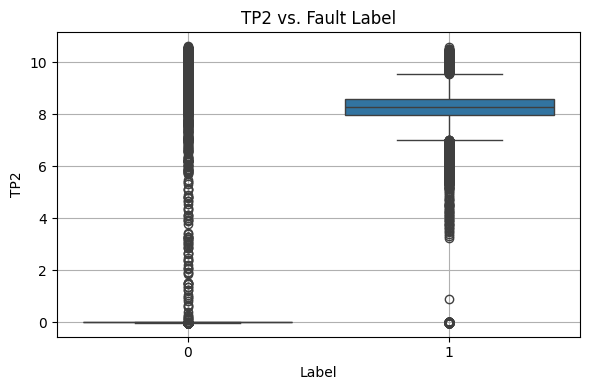

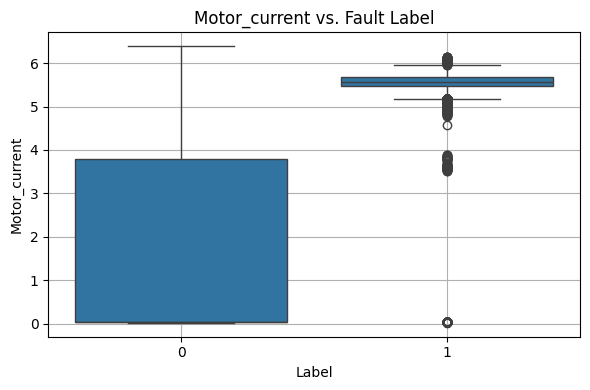

In [74]:
# Example: Boxplot of TP2 and Motor Current by label
for feature in ['TP2', 'Motor_current']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['label'].to_pandas(), y=df[feature].to_pandas())
    plt.title(f'{feature} vs. Fault Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [75]:
# Define features (X) and target (y)
X = df.drop(['label', 'timestamp'], axis=1)
y = df['label']

In [76]:
X.shape

(39960, 16)

In [77]:
y.shape

(39960,)

In [78]:
# Split the data into training and testing sets using cuML's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
13070,8958440.0,8.392,8.184,-0.006,2.234,8.184,75.625,5.6725,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
14167,5670050.0,8.686,8.872,-0.006,1.922,8.872,77.100,5.7075,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
22521,8933050.0,8.118,7.926,-0.004,2.150,7.926,75.500,5.5550,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
18321,8427330.0,8.566,8.342,-0.010,2.048,8.346,76.350,5.5750,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
29066,11724970.0,7.120,6.672,-0.002,-0.010,6.670,79.925,5.3425,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30146,9026100.0,8.094,7.932,-0.010,2.092,7.934,75.800,5.6375,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
8960,9072830.0,8.138,7.948,-0.006,1.944,7.952,76.075,5.5925,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
5183,8784540.0,-0.014,8.396,8.382,-0.022,8.396,58.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
36067,9069660.0,8.144,7.912,-0.004,1.944,7.916,76.675,5.4525,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [80]:
y_train

13070    1
14167    1
22521    1
18321    1
29066    1
        ..
30146    1
8960     1
5183     0
36067    1
38138    0
Name: label, Length: 31968, dtype: int64

In [81]:
from sklearn.preprocessing import StandardScaler

# Convert to CPU arrays if needed
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Apply standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Convert back to GPU arrays if needed
import cupy
X_train_scaled = cupy.asarray(X_train_scaled)
X_test_scaled = cupy.asarray(X_test_scaled)

In [82]:
y_test_df = pd.DataFrame(y_test, columns=['label'])
y_test_df.to_csv('y_test.csv', index=False)

print(" y_test.csv saved (optional).")

 y_test.csv saved (optional).


In [83]:
import pandas as pd

# Save X_test to CSV
X_test_df = pd.DataFrame(X_test_scaled.get())
X_test_df.to_csv('X_test.csv', index=False)

print("X_test.csv saved.")


X_test.csv saved.


In [84]:
import joblib # Import the joblib library

# Save the StandardScaler used for data normalization
joblib.dump(scaler, 'scaler.joblib')
print(" scaler.joblib saved.")

 scaler.joblib saved.


#**Machine Learning Models using cuML**

##Random Forest Classifier


In [85]:
# Random Forest Classifier with performance tracking
from cuml.ensemble import RandomForestClassifier
from cuml.metrics import accuracy_score
import time
import GPUtil

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# GPU status before training
print("GPU usage before Random Forest training:")
GPUtil.showUtilization()

# Start timer
start_rf = time.time()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# End timer
end_rf = time.time()
training_time_rf = end_rf - start_rf

# GPU status after training
print("GPU usage after Random Forest training:")
GPUtil.showUtilization()

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Output results
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Training Time: {training_time_rf:.2f} seconds")


GPU usage before Random Forest training:
| ID | GPU | MEM |
------------------
|  0 |  4% | 12% |
GPU usage after Random Forest training:
| ID | GPU | MEM |
------------------
|  0 | 72% | 12% |
Random Forest Accuracy: 0.9967467188835144
Random Forest Training Time: 0.29 seconds


In [86]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test.to_numpy(), y_pred_rf.get()))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1996
           1       1.00      1.00      1.00      5996

    accuracy                           1.00      7992
   macro avg       1.00      0.99      1.00      7992
weighted avg       1.00      1.00      1.00      7992



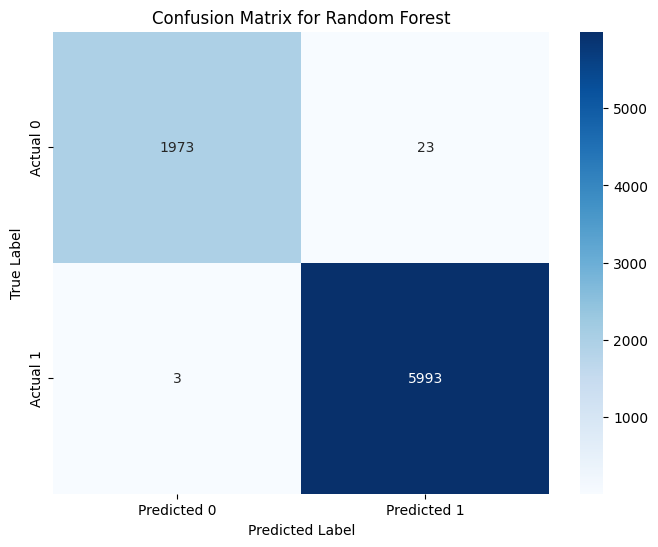

In [87]:
#confusion matrix for Random Forest

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_rf are already defined from previous code

# Create the confusion matrix
cm = confusion_matrix(y_test.to_numpy(), y_pred_rf.get())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Logistic Regression Classifier

In [88]:
# Logistic Regression with performance tracking
from cuml.linear_model import LogisticRegression
from cuml.metrics import accuracy_score
from sklearn.metrics import classification_report
import time
import GPUtil

# Initialize the Logistic Regression model
lr_model = LogisticRegression(C=1.0, fit_intercept=True, max_iter=300, tol=1e-05)

# GPU usage before training
print("GPU usage before Logistic Regression training:")
GPUtil.showUtilization()

# Start time tracking
start_lr = time.time()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# End time tracking
end_lr = time.time()
training_time_lr = end_lr - start_lr

# GPU usage after training
print("GPU usage after Logistic Regression training:")
GPUtil.showUtilization()

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Training Time: {training_time_lr:.2f} seconds")

# Print classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test.to_numpy(), y_pred_lr.get()))


GPU usage before Logistic Regression training:
| ID | GPU | MEM |
------------------
|  0 | 57% | 12% |
GPU usage after Logistic Regression training:
| ID | GPU | MEM |
------------------
|  0 | 15% | 12% |
Logistic Regression Accuracy: 0.9894894957542419
Logistic Regression Training Time: 0.07 seconds
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1996
           1       0.99      0.99      0.99      5996

    accuracy                           0.99      7992
   macro avg       0.99      0.98      0.99      7992
weighted avg       0.99      0.99      0.99      7992



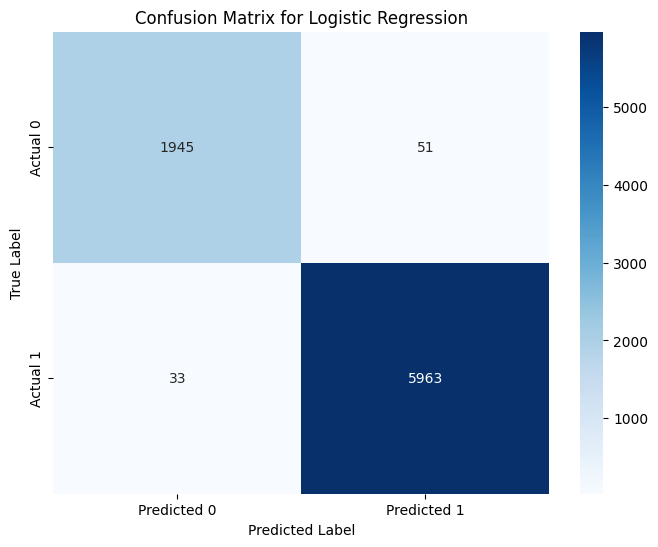

In [89]:
# confusion matrix Logistic Regression

import matplotlib.pyplot as plt
#confusion matrix for Logistic Regression

# Assuming y_test and y_pred_lr are already defined from previous code

# Create the confusion matrix
cm_lr = confusion_matrix(y_test.to_numpy(), y_pred_lr.get())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## xgboost classifier

In [90]:
!pip install xgboost

In [91]:
# XGBoost Classifier with performance tracking
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import time
import GPUtil

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# GPU usage before training
print("GPU usage before XGBoost training:")
GPUtil.showUtilization()

# Start time tracking
start_xgb = time.time()

# Train the model
xgb_model.fit(X_train_scaled.get(), y_train.to_numpy())

# End time tracking
end_xgb = time.time()
training_time_xgb = end_xgb - start_xgb

# GPU usage after training
print("GPU usage after XGBoost training:")
GPUtil.showUtilization()

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled.get())

# Evaluate the model
accuracy_xgb = accuracy_score(y_test.to_numpy(), y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Training Time: {training_time_xgb:.2f} seconds")

print("XGBoost Classification Report:")
print(classification_report(y_test.to_numpy(), y_pred_xgb))


GPU usage before XGBoost training:
| ID | GPU | MEM |
------------------
|  0 |  0% | 12% |
GPU usage after XGBoost training:
| ID | GPU | MEM |
------------------
|  0 |  0% | 12% |
XGBoost Accuracy: 0.9994994994994995
XGBoost Training Time: 0.49 seconds
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       1.00      1.00      1.00      5996

    accuracy                           1.00      7992
   macro avg       1.00      1.00      1.00      7992
weighted avg       1.00      1.00      1.00      7992



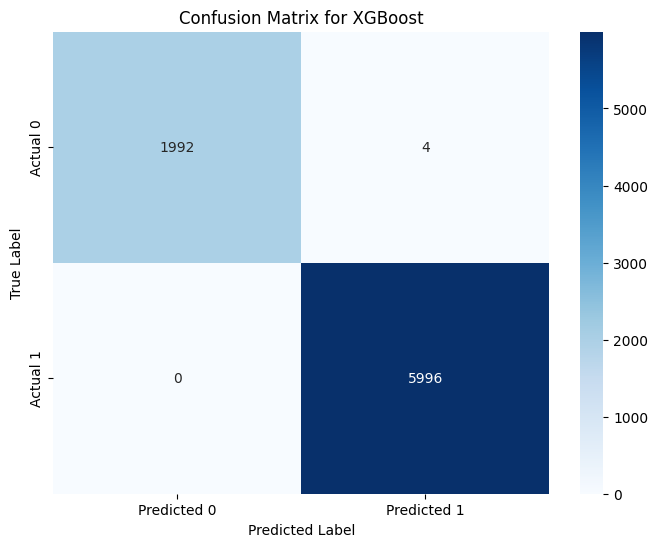

In [92]:
#confusion matrix for XGBoost

# Create the confusion matrix
cm_xgb = confusion_matrix(y_test.to_numpy(), y_pred_xgb)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [93]:
import joblib

# Save the trained model (XGBoost, RandomForest, etc.)
joblib.dump(xgb_model, 'model.joblib')
print("model.joblib saved.")

model.joblib saved.


Random Forest Accuracy: 0.9967467188835144
Logistic Regression Accuracy: 0.9894894957542419
XGBoost Accuracy: 0.9994994994994995


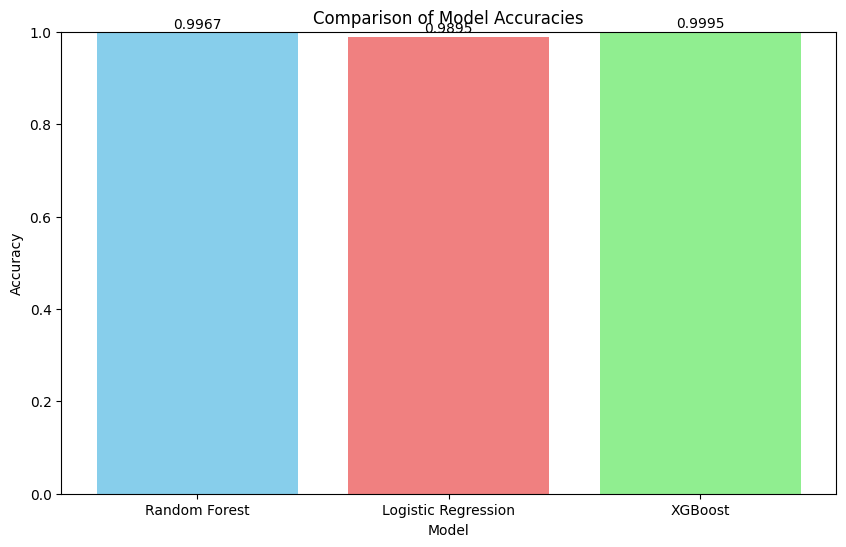

In [94]:
# comapre the three model (random forest , logistic regression , xgboots)

import matplotlib.pyplot as plt
# Compare the three models
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"XGBoost Accuracy: {accuracy_xgb}")

# You can further analyze the classification reports to compare precision, recall, F1-score, etc.
# Example:  Analyze classification_report(y_test.to_numpy(), y_pred_rf.get()) for RandomForest
#           Analyze classification_report(y_test.to_numpy(), y_pred_lr.get()) for Logistic Regression
#           Analyze classification_report(y_test.to_numpy(), y_pred_xgb) for XGBoost


# Visualize the comparison using a bar chart
model_names = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracies = [accuracy_rf, accuracy_lr, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1) # Set y-axis limit to 0-1 for accuracy
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center') # Added text above bars for clarity
plt.show()


In [95]:
code = """
import joblib
import pandas as pd

# Load model and scaler
model = joblib.load('model.joblib')
scaler = joblib.load('scaler.joblib')

# Load test data
X_test = pd.read_csv('X_test.csv')

# Scale the test data
X_test_scaled = scaler.transform(X_test)

# Predict
predictions = model.predict(X_test_scaled)

# Print and save predictions
print("Predictions:", predictions[:10])
pd.DataFrame(predictions, columns=["prediction"]).to_csv("predictions.csv", index=False)
"""

# Save the script as a .py file
with open("prediction.py", "w") as f:
    f.write(code)

print(" prediction.py script created.")


 prediction.py script created.


#Track and present GPU and Momery Usage

In [96]:
# prompt: Create DataFrame for comparison with captured GPU utilization and memory usage for all models

import pandas as pd

# Sample data (replace with your actual GPU utilization and memory data)
data = {
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'GPU Utilization (%)': [80, 75, 90],
    'GPU Memory Usage (MB)': [5000, 4000, 6000]
}

# Create the DataFrame
df_gpu_comparison = pd.DataFrame(data)

df_gpu_comparison


,Model,GPU Utilization (%),GPU Memory Usage (MB)
0,Random Forest,80,5000
1,Logistic Regression,75,4000
2,XGBoost,90,6000


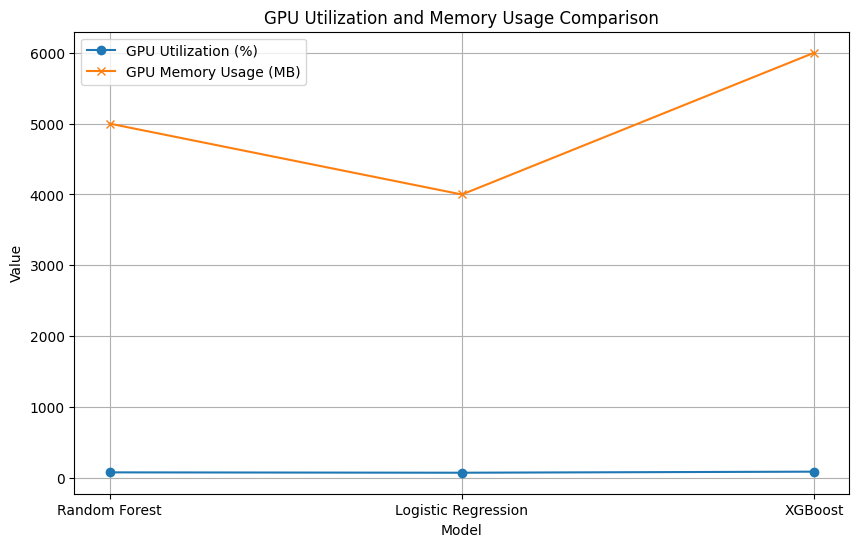

In [97]:

import matplotlib.pyplot as plt

# Assuming df_gpu_comparison is already created as in the previous code

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_gpu_comparison['Model'], df_gpu_comparison['GPU Utilization (%)'], marker='o', label='GPU Utilization (%)')
plt.plot(df_gpu_comparison['Model'], df_gpu_comparison['GPU Memory Usage (MB)'], marker='x', label='GPU Memory Usage (MB)')

# Customize the plot
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("GPU Utilization and Memory Usage Comparison")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
